In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import imageio
import cv2 as cv
import numpy as np

In [6]:
from astropy.io import fits
import matplotlib.pyplot as plt
import imageio
images = []
FlarePixelNumber = []
for n in range(0,49):
    if n<10:
        data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_0'+str(n)+'.fits')[0].data
    if n>=10:
        data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_'+str(n)+'.fits')[0].data
    data = data[600:850,1100:1400]
    data[data<4000] = 0
    data[data>=3000] = 255
    data = cv.medianBlur(data,3)
    FlarePixelNumber.append(np.count_nonzero(data))
    images.append(data)
# imageio.mimwrite('FlareAbbused.gif', images)

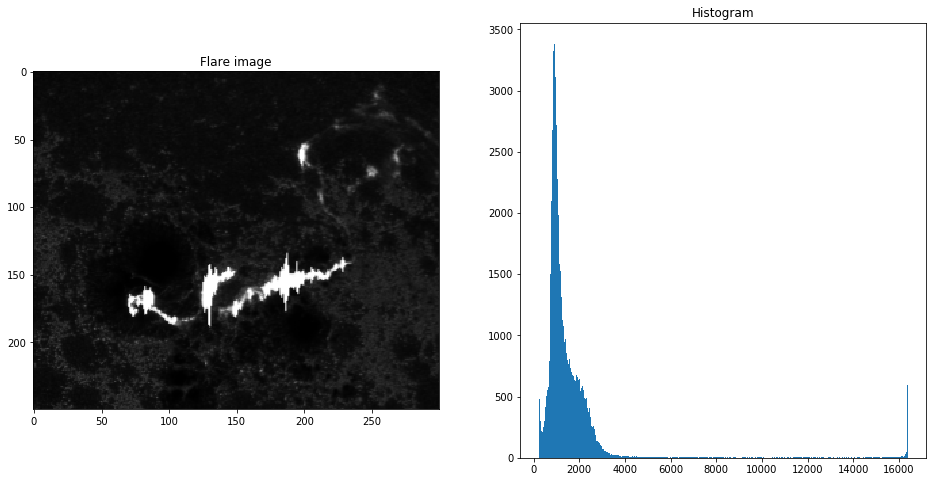

In [7]:
from astropy.io import fits
data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_'+str(12)+'.fits')[0].data
data = data[600:850,1100:1400]
# data[data<4000] = 0
# data[data>=4000] = 255
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.imshow(data,'gray')
plt.title('Flare image')
plt.subplot(1,2,2)
plt.title('Histogram')
NBINS = 500
histogram = plt.hist(data.flatten(), NBINS)

Text(0.5,1,'Histogram')

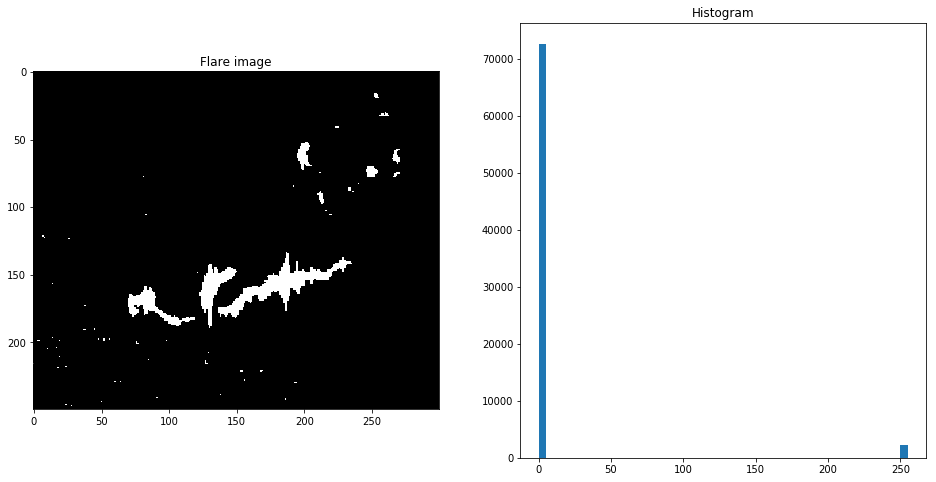

In [8]:
import cv2 as cv
data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_'+str(12)+'.fits')[0].data
data = data[600:850,1100:1400]
data[data<4000] = 0
data[data>=4000] = 255
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.imshow(data,'gray')
plt.title('Flare image')
plt.subplot(1,2,2)
NBINS = 50
histogram = plt.hist(data.flatten(), NBINS)
plt.title('Histogram')

Text(0.5,1,'Histogram')

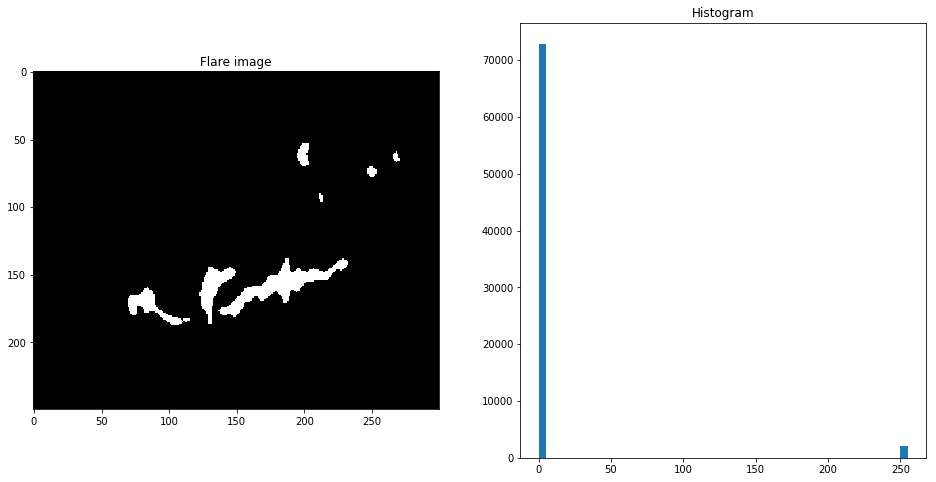

In [9]:
data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_'+str(12)+'.fits')[0].data
data = data[600:850,1100:1400]
data[data<4000] = 0
data[data>=4000] = 255
data = cv.medianBlur(data,5)
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.imshow(data,'gray')
plt.title('Flare image')
plt.subplot(1,2,2)
NBINS = 50
histogram = plt.hist(data.flatten(), NBINS)
plt.title('Histogram')

In [10]:
data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_'+str(12)+'.fits')[0]
arcPix = data.header['CDELT2']
SolarPixelRadius = data.header['RSUN_OBS']/arcPix
SolarRadius = 695510 
PixelSize = SolarRadius/SolarPixelRadius
PixelArea = PixelSize**2
print("PixelSize:",PixelSize,'km')
print('Pixel Area:',PixelArea,'km^2')

PixelSize: 883.4576110701324 km
Pixel Area: 780497.3505577454 km^2


Text(0.5,0,'Minutes')

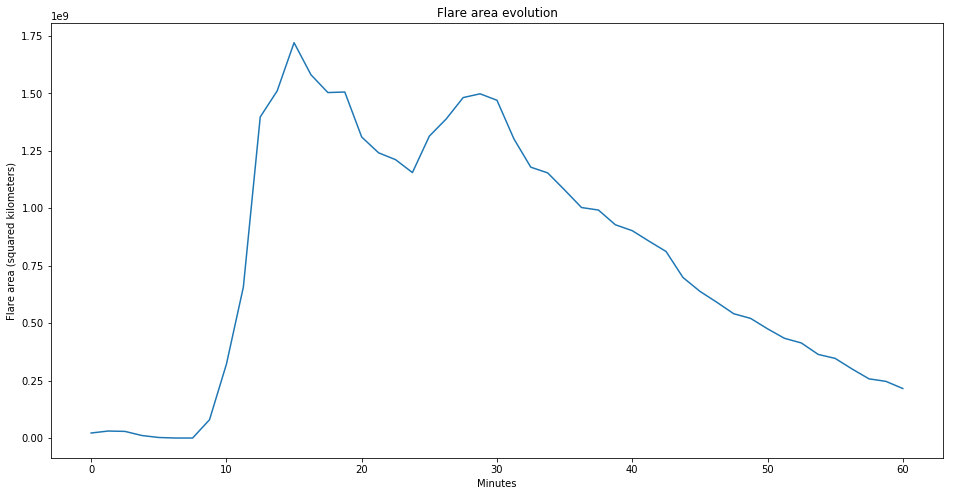

In [11]:
FlareArea = np.array(FlarePixelNumber)*PixelArea
time = np.linspace(0,60,49)
plt.figure(figsize = (16,8))
plt.plot(time,FlareArea)
plt.title('Flare area evolution')
plt.ylabel('Flare area (squared kilometers)')
plt.xlabel('Minutes')

In [12]:
import pandas as pd
goes = pd.read_csv('goes.txt', sep="  ", header=None)
goes.columns = ["Time (in sec)", "X-ray flux (in Wm^2)"]

C:\Users\Harkn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Text(0.5,1,'GOES soft X-ray flux in the 1–8 Å wavelength band')

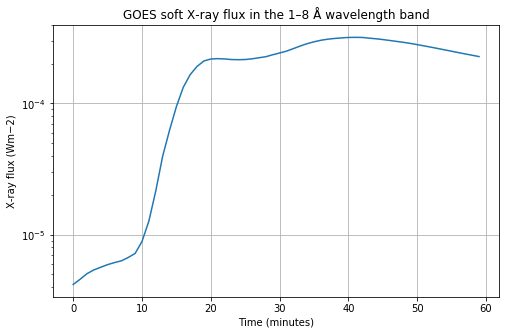

In [13]:
import matplotlib.pyplot as plt
Xray = goes["X-ray flux (in Wm^2)"]
timeGOES = goes["Time (in sec)"]/60
plt.figure(figsize = (8,5))
plt.plot(timeGOES,Xray)
plt.yscale('log')
plt.grid()
plt.xlabel('Time (minutes)')
plt.ylabel('X-ray flux (Wm−2)')
plt.title('GOES soft X-ray flux in the 1–8 Å wavelength band')

Text(0.5,1,' X-ray flux derivative VS Flare Area w/o interpolation')

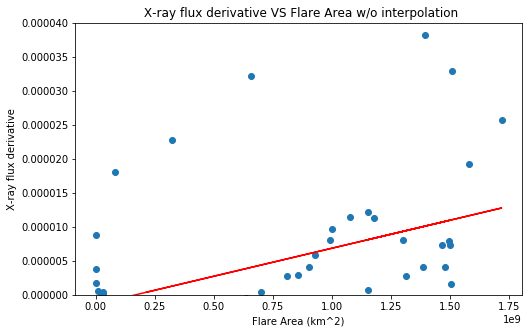

In [14]:
difX = np.diff(Xray)
plt.figure(figsize = (8,5))
plt.scatter(FlareArea,difX[5:54])
p = np.poly1d(np.polyfit(FlareArea, difX[5:54], 1))
plt.plot(FlareArea,p(FlareArea),'r')
plt.ylim(0,0.00004)
plt.xlabel('Flare Area (km^2)')
plt.ylabel('X-ray flux derivative')
plt.title(' X-ray flux derivative VS Flare Area w/o interpolation')

In [15]:
from scipy.stats import pearsonr
pearsonr(FlareArea,p(FlareArea))

(0.9999999999999999, 0.0)

In [16]:
len(difX)

59

In [17]:
len(timeGOES)

60

In [18]:
len(Xray)

60

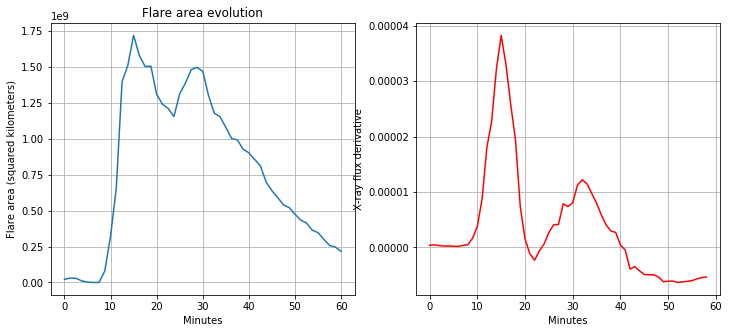

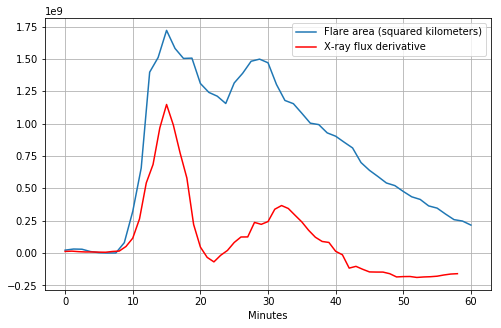

In [19]:
difX = np.diff(Xray)
time = np.linspace(0,60,49)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(time,FlareArea)
plt.title('Flare area evolution')
plt.ylabel('Flare area (squared kilometers)')
plt.xlabel('Minutes')
plt.grid()
plt.subplot(1,2,2)
plt.plot(timeGOES[:-1],difX,'r')
plt.grid()
plt.ylabel('X-ray flux derivative')
plt.xlabel('Minutes')
plt.figure(figsize = (8,5))
plt.plot(time,FlareArea)
plt.plot(timeGOES[:-1],difX*10**13*3,'r')
plt.grid()
plt.xlabel('Minutes')
plt.legend(['Flare area (squared kilometers)','X-ray flux derivative'])


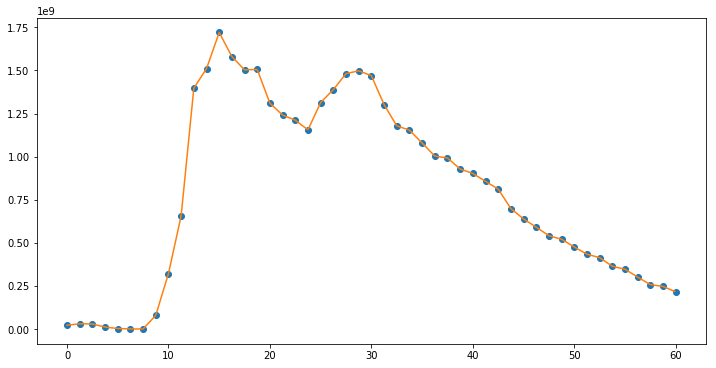

In [20]:
from scipy import interpolate
f = interpolate.interp1d(time,FlareArea)
xnew = np.arange(0, 60, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.figure(figsize = (12,6))
plt.plot(time,FlareArea, 'o', xnew, ynew, '-')

Text(0.5,1,' X-ray flux derivative VS Flare Area w/ interpolation')

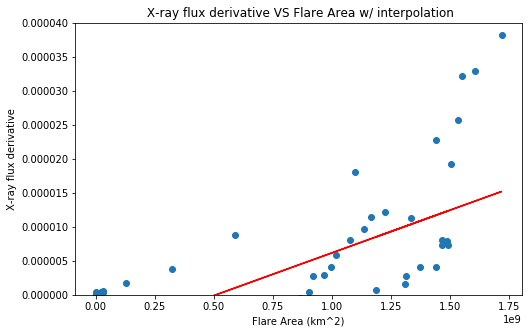

In [21]:
difX = np.diff(Xray)
plt.figure(figsize = (8,5))
plt.scatter(ynew[0:-10:10],difX)
p = np.poly1d(np.polyfit(ynew[0:-10:10], difX, 1))
plt.plot(ynew[0:-10:10],p(ynew[0:-10:10]),'r')
plt.ylim(0,0.00004)
plt.xlabel('Flare Area (km^2)')
plt.ylabel('X-ray flux derivative')
plt.title(' X-ray flux derivative VS Flare Area w/ interpolation')

In [22]:
from scipy.stats import pearsonr
pearsonr(ynew[0:-10:10],p(ynew[0:-10:10]))

(1.0, 0.0)

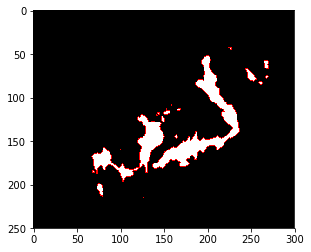

In [25]:
images = []
FlarePixelNumber = []
dataContinuum = np.zeros((250,300)).astype('uint8')
for n in range(0,49):
    if n<10:
        data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_0'+str(n)+'.fits')[0].data
    if n>=10:
        data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_'+str(n)+'.fits')[0].data
    data = data[600:850,1100:1400]
    data[data<4000] = 0
    data[data>=4000] = 255
    data = cv.medianBlur(data,5)
    data = data.astype('uint8')
    contours, hierarch = cv.findContours(data, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    dataContinuum = cv.fillPoly(dataContinuum, contours, color=(255, 255, 255))


contours, hierarch = cv.findContours(dataContinuum, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
dataContinuum = cv.cvtColor(dataContinuum, cv.COLOR_RGB2BGR)    
dataContinuum = cv.drawContours(dataContinuum, contours, -1, (0, 0, 255),1)
plt.imshow(cv.cvtColor(dataContinuum, cv.COLOR_BGR2RGB))


In [26]:
FlareCoordinates = []
for rows in range(dataContinuum.shape[0]):
    for columns in range(dataContinuum.shape[1]):
        for n in contours:
            if (cv.pointPolygonTest(n, (rows,columns),measureDist=False)) == 1:
                FlareCoordinates.append([rows,columns]) 


In [27]:
print('Total solar flare area:',len(FlareCoordinates)*PixelArea,'km^2')

Total solar flare area: 3033793201.6179566 km^2


In [28]:
EartRadius = 6371000
EarthCrossSection = np.pi*EartRadius*2
print((len(FlareCoordinates)*PixelArea)/EarthCrossSection)

75.78766039178855


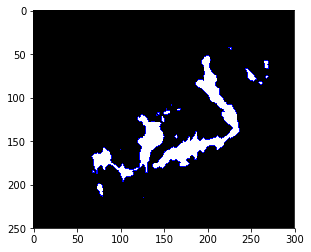

In [107]:
plt.imshow(dataContinuum)

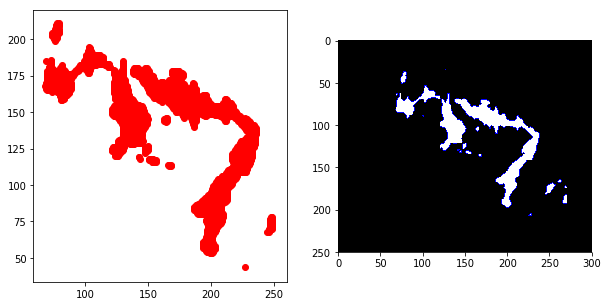

In [108]:
dataContinuum = np.flipud(dataContinuum)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
for r in range(len(FlareCoordinates)):
    plt.scatter(FlareCoordinates[r][0], FlareCoordinates[r][1],c='r') 
plt.subplot(1,2,2)
plt.imshow(dataContinuum)

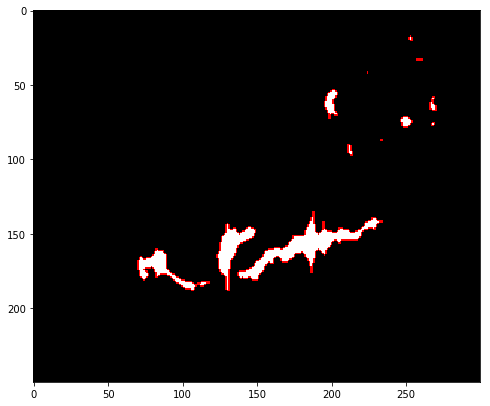

In [109]:
data = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_'+str(12)+'.fits')[0].data
data = data[600:850,1100:1400]
data[data<4000] = 0
data[data>=4000] = 255
data = cv.medianBlur(data,3)
data = data.astype('uint8')
contours, hierarch = cv.findContours(data, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
data = cv.cvtColor(data, cv.COLOR_RGB2BGR)

plt.figure(figsize=(8,8))
data = cv.drawContours(data, contours, -1, (0, 0, 255),1)
plt.imshow(cv.cvtColor(data, cv.COLOR_BGR2RGB))

Text(0.5,1,'AIA 1700 (at time of flare maximum)')

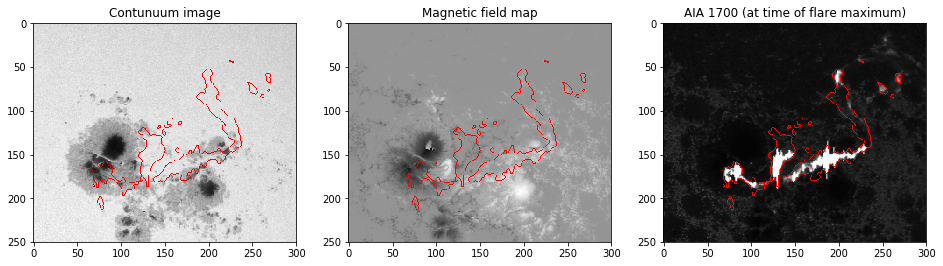

In [48]:
dataContinuum = fits.open('HMI_24-Oct-2014_cal/HMI_continuum.fits')[0].data
dataContinuum = dataContinuum[600:850,1100:1400]
dataContinuum = np.round(dataContinuum/239).astype('uint8')

dataMagnetogram = fits.open('HMI_24-Oct-2014_cal/HMI_magnetogram.fits')[0].data
dataMagnetogram = dataMagnetogram[600:850,1100:1400]
dataMagnetogram = np.round((dataMagnetogram+2815.1694)/19).astype('uint8')

dataMax1700 = fits.open('AIA_24-Oct-2014_cal/'+'AIA_1700_'+str(12)+'.fits')[0].data
dataMax1700 = dataMax1700[600:850,1100:1400]
dataMax1700 = np.round((dataMax1700)/65).astype('uint8')

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
dataContinuum = cv.cvtColor(dataContinuum, cv.COLOR_RGB2BGR)    
dataContinuum = cv.drawContours(dataContinuum, contours, -1, (0, 0, 255),1)
plt.imshow(cv.cvtColor(dataContinuum, cv.COLOR_BGR2RGB))
plt.title('Contunuum image')

plt.subplot(1,3,2)
dataMagnetogram = cv.cvtColor(dataMagnetogram, cv.COLOR_RGB2BGR)    
dataMagnetogram = cv.drawContours(dataMagnetogram, contours, -1, (0, 0, 255),1)
plt.imshow(cv.cvtColor(dataMagnetogram, cv.COLOR_BGR2RGB))
plt.title('Magnetic field map')

plt.subplot(1,3,3)
dataMax1700 = cv.cvtColor(dataMax1700, cv.COLOR_RGB2BGR)    
dataMax1700 = cv.drawContours(dataMax1700, contours, -1, (0, 0, 255),1)
plt.imshow(cv.cvtColor(dataMax1700, cv.COLOR_BGR2RGB))
plt.title('AIA 1700 (at time of flare maximum)')

In [36]:
np.max(dataMax1700)/65

252.04615384615386

In [50]:
dataMagnetogram = fits.open('HMI_24-Oct-2014_cal/HMI_magnetogram.fits')[0].data
dataMagnetogram = dataMagnetogram[600:850,1100:1400]
valuePositive = 0
valueNigative = 0
for n in FlareCoordinates:
    if dataMagnetogram[n[0],n[1]]>0:
        valuePositive += dataMagnetogram[n[0],n[1]]
    if dataMagnetogram[n[0],n[1]]<0:   
         valueNigative += dataMagnetogram[n[0],n[1]]
print(valuePositive*PixelArea*10**10,"Mx")
print(valueNigative*PixelArea*10**10,"Mx")

3.705451062672312e+21 Mx
-4.316104220257144e+21 Mx
